In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# data preparation

In [ ]:
import pandas as pd
import numpy as np


train_data  = pd.read_csv('/content/drive/MyDrive/Machine hack/deloitte/train.csv')

train_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


Text(0, 0.5, 'Frequency')

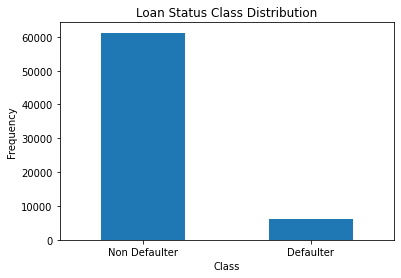

In [ ]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

count_classes = pd.value_counts(train_data['Loan Status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Loan Status Class Distribution")

LABELS = ['Non Defaulter','Defaulter']

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
train_data['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [ ]:
# columns=['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status',
#                           'Loan Title', 'Initial List Status', 'Application Type'],axis=1

# train_data = train_data.drop(['ID','Batch Enrolled', 'Grade', 'Sub Grade', 'Verification Status','Loan Title', 'Initial List Status', 'Application Type'], axis=1)
# train_data.head(2)

In [ ]:
train_data.rename({'Employment Duration': 'HomeOwnership', 'Home Ownership':'EmploymentDuration'}, inplace=True, axis=1)

In [ ]:
train_data.rename({'EmploymentDuration': 'Employment Duration', 'HomeOwnership':'Home Ownership'}, inplace=True, axis=1)
train_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
train_data = train_data.drop(['ID'], axis=1)
train_data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
train_data['Sub Grade'].unique()

array(['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1', 'B4',
       'A4', 'B2', 'D2', 'C1', 'F3', 'D1', 'F2', 'A2', 'A3', 'F1', 'E5',
       'B3', 'F4', 'G1', 'F5', 'E1', 'E2', 'D5', 'G2', 'E4', 'A1', 'G3',
       'E3', 'G4'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()

train_data['Term']=le.fit_transform(train_data['Term'])
train_data['Batch Enrolled'] = le.fit_transform(train_data['Batch Enrolled'])
train_data['Home Ownership'] =  le.fit_transform(train_data['Home Ownership'])
train_data['Verification Status'] = le.fit_transform(train_data['Verification Status'])
train_data['Payment Plan'] = le.fit_transform(train_data['Payment Plan'])
train_data['Loan Title'] =  le.fit_transform(train_data['Loan Title'])
train_data['Application Type'] =  le.fit_transform(train_data['Application Type'])
train_data['Initial List Status'] =  le.fit_transform(train_data['Initial List Status'])


In [ ]:
import numpy as np

train_data['Term'] = train_data['Term'].astype(np.int)
train_data['Batch Enrolled'] = train_data['Batch Enrolled'].astype(np.int)
train_data['Home Ownership'] =  train_data['Home Ownership'].astype(np.int)
train_data['Verification Status'] = train_data['Verification Status'].astype(np.int)
train_data['Payment Plan'] = train_data['Payment Plan'].astype(np.int)
train_data['Loan Title'] =  train_data['Loan Title'].astype(np.int)
train_data['Application Type'] =  train_data['Application Type'].astype(np.int)
train_data['Initial List Status'] =  train_data['Initial List Status'].astype(np.int)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

order1 = ['A', 'B', 'C','D','E','F','G']
order2 = ['A1', 'A2', 'A3','A4','A5', 'B1', 'B2', 'B3','B4','B5', 'C1', 'C2', 'C3','C4','C5', 'D1', 'D2', 'D3','D4','D5', 'E1', 'E2', 'E3','E4','E5','F1', 'F2', 'F3','F4','F5','G1', 'G2', 'G3','G4','G5']
ordinal1 = OrdinalEncoder(categories=[order1])
ordinal2 = OrdinalEncoder(categories=[order2])
train_data['Grade'] = ordinal1.fit_transform(train_data[['Grade']])
train_data['Sub Grade'] = ordinal2.fit_transform(train_data[['Sub Grade']])

In [ ]:
train_data['Grade'] =  train_data['Grade'].astype(np.int)
train_data['Sub Grade'] =  train_data['Sub Grade'].astype(np.int)

In [ ]:
train_data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,2,16,11.135007,1,13,0,176346.62670,0,0,42,16.284758,1,0,13,0,24246,74.932551,7,1,2929.646315,0.102055,2.498291,0.793724,0,0,49,0,31,311301,6619,0
1,3609,11940,12191.99692,2,4,12.237563,2,17,2,39833.92100,1,0,49,15.412409,0,0,12,0,812,78.297186,13,0,772.769385,0.036181,2.377215,0.974821,0,0,109,0,53,182610,20885,0
2,28276,9311,21603.22455,2,11,12.545884,5,18,0,91506.69105,1,0,42,28.137619,0,0,14,0,1843,2.073040,20,1,863.324396,18.778660,4.316277,1.020075,0,0,66,0,34,89801,26155,0
3,11170,6954,17877.15585,2,15,16.731201,2,12,0,108286.57590,1,0,49,18.043730,1,0,7,0,13819,67.467951,12,1,288.173196,0.044131,0.107020,0.749971,0,0,39,0,40,9189,60214,0
4,16890,13226,13539.92667,2,32,15.008300,2,18,0,44234.82545,1,0,38,17.209886,1,3,13,1,1544,85.250761,22,1,129.239553,19.306646,1294.818751,0.368953,0,0,18,0,430,126029,22579,0


In [ ]:
X = train_data.iloc[:,:-1]
y = train_data['Loan Status']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Loan Status, dtype: int64

# sampling

In [ ]:
Defaulter = y[y == 1]
NonDefaulter = y[y== 0]

print(NonDefaulter.shape,Defaulter.shape)

(61222,) (6241,)


In [ ]:
!pip install imblearn

# Under sampling

In [ ]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)


# from imblearn.under_sampling import RandomUnderSampler

# under_sampler = RandomUnderSampler()
# X_res, y_res = under_sampler.fit_resample(X, y)

In [ ]:
X_res.shape,y_res.shape

((12482, 33), (12482,))

In [ ]:
Defaulter = y_res[y_res == 1]
NonDefaulter = y_res[y_res== 0]

print(NonDefaulter.shape,Defaulter.shape)

(6241,) (6241,)


# Split n Over sampling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3, stratify=train_data['Loan Status'])


In [ ]:
X_train.shape, y_train.shape

from collections import Counter
print(Counter(y))

Counter({0: 61222, 1: 6241})


In [ ]:
from collections import Counter
print(Counter(y_train))

Counter({0: 42855, 1: 4369})


In [ ]:

# example of random oversampling to balance the class distribution
from collections import Counter
print(Counter(y_test))
#scale_pos_weight = sqrt(count(negative examples)/count(Positive examples))
print(np.sqrt(42855/4369))

Counter({0: 18367, 1: 1872})
3.1319132731836428


# Over sample

Random oversampling

In [ ]:
## RandomOverSampler to handle imbalanced data

# from imblearn.over_sampling import RandomOverSampler

In [ ]:
# os =  RandomOverSampler()

In [ ]:
# X_train_res, y_train_res = os.fit_resample(X_train, y_train)

In [ ]:
# Defaulter = y_train_res[y_train_res == 1]
# NonDefaulter = y_train_res[y_train_res== 0]

# print(NonDefaulter.shape,Defaulter.shape)

# Defaulter = y_test[y_test == 1]
# NonDefaulter = y_test[y_test== 0]

# print(NonDefaulter.shape,Defaulter.shape)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_train_res,y_train_res,random_state=0)


**SMOT**

In [ ]:
#Installing imblearn
!pip install -U imbalanced-learn

In [ ]:
import pandas as pd
#import seaborns as sns

#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
smotenc = SMOTENC([3,4,6,7,8,10,11,12,21,27])
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print(Counter(y_oversample))

Counter({0: 42855, 1: 42855})


# Logistic reg

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='accuracy')
clf.fit(X_oversample,y_oversample)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']},
             scoring='accuracy')

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11124  7243]
 [ 1117   755]]
0.5869361134443402
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     18367
           1       0.09      0.40      0.15      1872

    accuracy                           0.59     20239
   macro avg       0.50      0.50      0.44     20239
weighted avg       0.83      0.59      0.67     20239



# Random forest

In [ ]:

#class_weight=dict({0:1,1:9})
from sklearn.model_selection import train_test_split

xgb_all_preds = pd.DataFrame(xgb_all_preds,columns=["xgbreg"])

X_forest = pd.concat([X,xgb_all_preds],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_forest,y,random_state=0,test_size=0.2, stratify=train_data['Loan Status'])

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, max_features='log2', max_depth=10, min_samples_leaf=26, bootstrap=True)
regressor.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=26)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, mean_absolute_error, mean_squared_error
forest_pred=regressor.predict(X_test)
#print(confusion_matrix(y_test,forest_pred))
print("random forest RMSE:", np.sqrt(mean_squared_error(y_test, forest_pred)))
print("random forest logloss:", log_loss(y_test,forest_pred))

random forest RMSE: 0.2919463573203769
random forest logloss: 0.31107649917927954


In [1]:
# forest_all_pred=regressor.predict(X)

# CATBOOST

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier,cv,Pool,sum_models
class_weight=dict({0:1,1:1.1})

clf=CatBoostClassifier(loss_function='Logloss', class_weights=class_weight)

In [ ]:
#X_train_res.head(2)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

#3,4,6,7,8,10,11,12,21,27
clf.fit(X_oversample, y_oversample,eval_set=(X_test,y_test),cat_features=[3,4,6,7,8,10,11,12,21,27])

Learning rate set to 0.095141
0:	learn: 0.6797607	test: 0.6853176	best: 0.6853176 (0)	total: 196ms	remaining: 3m 15s
1:	learn: 0.6690032	test: 0.6799917	best: 0.6799917 (1)	total: 356ms	remaining: 2m 57s
2:	learn: 0.6599545	test: 0.6761184	best: 0.6761184 (2)	total: 491ms	remaining: 2m 43s
3:	learn: 0.6519148	test: 0.6725375	best: 0.6725375 (3)	total: 658ms	remaining: 2m 43s
4:	learn: 0.6453316	test: 0.6698947	best: 0.6698947 (4)	total: 796ms	remaining: 2m 38s
5:	learn: 0.6392809	test: 0.6675036	best: 0.6675036 (5)	total: 944ms	remaining: 2m 36s
6:	learn: 0.6338828	test: 0.6655740	best: 0.6655740 (6)	total: 1.09s	remaining: 2m 35s
7:	learn: 0.6293961	test: 0.6642105	best: 0.6642105 (7)	total: 1.25s	remaining: 2m 35s
8:	learn: 0.6252484	test: 0.6631980	best: 0.6631980 (8)	total: 1.41s	remaining: 2m 35s
9:	learn: 0.6207713	test: 0.6616733	best: 0.6616733 (9)	total: 1.56s	remaining: 2m 34s
10:	learn: 0.6169564	test: 0.6601602	best: 0.6601602 (10)	total: 1.74s	remaining: 2m 36s
11:	learn: 

In [ ]:
# import pandas as pd
# #import seaborns as sns

# #Import the SMOTE-NC
# from imblearn.over_sampling import SMOTENC
# #Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
# smotenc = SMOTENC([3,4,6,7,8,10,11,12,21,27])
# X_sample, y_sample = smotenc.fit_resample(X, y)

In [ ]:
catpred= clf.predict(X_test)

In [ ]:
print(catpred)
from collections import Counter
print(Counter(catpred))

[0 0 0 ... 1 0 0]
Counter({0: 16592, 1: 3647})


In [ ]:
catpred_prob= clf.predict_proba(X_test)
catpred_prob

array([[0.87963198, 0.12036802],
       [0.86842314, 0.13157686],
       [0.97596226, 0.02403774],
       ...,
       [0.4707164 , 0.5292836 ],
       [0.96361979, 0.03638021],
       [0.78781385, 0.21218615]])

In [ ]:
# catpred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('CATBOOST Train accuracy %s' % clf.score(X_train, y_train))
print('CATBOOST Test accuracy %s' % accuracy_score(catpred, y_test))
print(classification_report(y_test,catpred))
print(confusion_matrix(y_test,catpred))

CATBOOST Train accuracy 0.8444858546501779
CATBOOST Test accuracy 0.7609071594446366
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     18367
           1       0.09      0.18      0.12      1872

    accuracy                           0.76     20239
   macro avg       0.50      0.50      0.49     20239
weighted avg       0.83      0.76      0.79     20239

[[15060  3307]
 [ 1532   340]]


In [ ]:
from sklearn.metrics import log_loss

print('CATBOOST Log loss %s' % log_loss(y_test,catpred_prob[:,1]))

CATBOOST Log loss 0.5234128633159794


# LGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
#class_weight=dict({0:1,1:1.1})

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_oversample, y_oversample)
lgbm_pred=lgbm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(lgbm_pred, y_test)
print("LightGBM accuracy score: {0:0.4f}".format(accuracy_score(y_test, lgbm_pred)))

LightGBM accuracy score: 0.7552


In [ ]:
# Training set score
y_pred_train = lgbm.predict(X_train)
print('LightGBM Model training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

LightGBM Model training-set accuracy score: 0.7745


In [ ]:
# Testing set score
accuracy=accuracy_score(lgbm_pred, y_test)
print('LightGBM Model testing-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lgbm_pred)))

LightGBM Model testing-set accuracy score: 0.7552


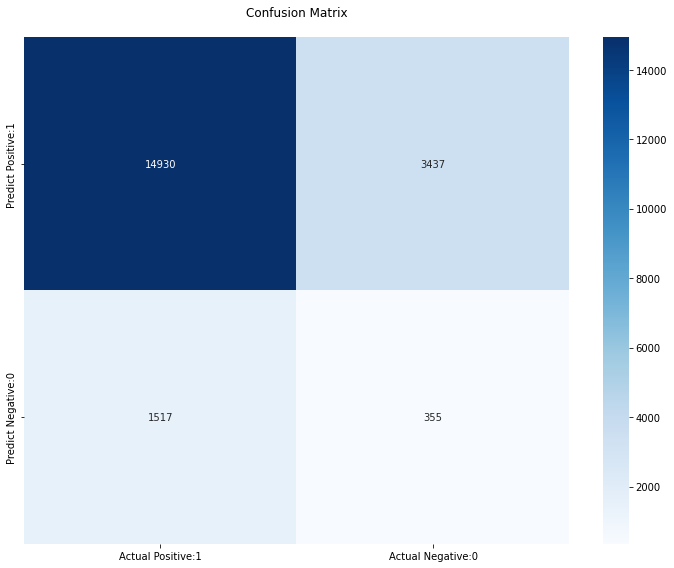

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('CATBOOST Train accuracy %s' % lgbm.score(X_train, y_train))
print('CATBOOST Test accuracy %s' % accuracy_score(catpred, lgbm_pred))


CATBOOST Train accuracy 0.7745426054548534
CATBOOST Test accuracy 0.9027125846138643


In [ ]:
print(lgbm_pred)
from collections import Counter
print(Counter(lgbm_pred))

[0 0 0 ... 0 0 0]
Counter({0: 16447, 1: 3792})


In [ ]:
lgbm_prob= lgbm.predict_proba(X_test)
lgbm_log= lgbm_prob[:,1]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     18367
           1       0.09      0.19      0.13      1872

    accuracy                           0.76     20239
   macro avg       0.50      0.50      0.49     20239
weighted avg       0.83      0.76      0.79     20239



In [ ]:
from sklearn.metrics import log_loss

print('CATBOOST Log loss %s' % log_loss(y_test,lgbm_log))

CATBOOST Log loss 0.5388750940790786


# Catboost regressor

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [ ]:
import catboost as cb

import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance


In [ ]:
import pandas as pd
#import seaborns as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

#Import the SMOTE-NC
from imblearn.over_sampling import SMOTE
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
smote = SMOTE()

# X_catreg, y_catreg = smote.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5, stratify=y)


train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

catreg = cb.CatBoostRegressor()
catreg.fit(X_train,y_train)

catreg_pred = catreg.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

logloss = (log_loss(y_test, catreg_pred))
rmse = (np.sqrt(mean_squared_error(y_test, catreg_pred)))
print("Testing performance")
print('Logloss: {:.2f}'.format(logloss))
print('RMSE: {:.2f}'.format(rmse))

# parameters = {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1], 'iterations': [30, 50, 100]}

# grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
# grid.fit(X_train, y_train)


Learning rate set to 0.076888
0:	learn: 0.2897011	total: 64.6ms	remaining: 1m 4s
1:	learn: 0.2896572	total: 81.3ms	remaining: 40.6s
2:	learn: 0.2896083	total: 96ms	remaining: 31.9s
3:	learn: 0.2895714	total: 110ms	remaining: 27.4s
4:	learn: 0.2895303	total: 125ms	remaining: 24.9s
5:	learn: 0.2894831	total: 141ms	remaining: 23.3s
6:	learn: 0.2894376	total: 156ms	remaining: 22.2s
7:	learn: 0.2894058	total: 170ms	remaining: 21s
8:	learn: 0.2893527	total: 183ms	remaining: 20.2s
9:	learn: 0.2893240	total: 200ms	remaining: 19.8s
10:	learn: 0.2892953	total: 214ms	remaining: 19.3s
11:	learn: 0.2892689	total: 227ms	remaining: 18.7s
12:	learn: 0.2892252	total: 242ms	remaining: 18.4s
13:	learn: 0.2891920	total: 256ms	remaining: 18s
14:	learn: 0.2891389	total: 271ms	remaining: 17.8s
15:	learn: 0.2891167	total: 285ms	remaining: 17.5s
16:	learn: 0.2890770	total: 298ms	remaining: 17.2s
17:	learn: 0.2890244	total: 314ms	remaining: 17.1s
18:	learn: 0.2889909	total: 328ms	remaining: 17s
19:	learn: 0.288

In [ ]:
catreg_all_pred = catreg.predict(X)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

In [ ]:
catreg_pred = grid.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

logloss = (log_loss(y_test, catreg_pred))
rmse = (np.sqrt(mean_squared_error(y_test, catreg_pred)))
print("Testing performance")
print('Logloss: {:.2f}'.format(logloss))
print('RMSE: {:.2f}'.format(rmse))

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(Xreg.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [ ]:
catreg_pred

array([0.09098071, 0.08555562, 0.09606335, ..., 0.08677645, 0.0979291 ,
       0.08918314])

# XGB regressor

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split

#Import the SMOTE-NC
from imblearn.over_sampling import SMOTE
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
# smote = SMOTE()

# X_catreg, y_catreg = smote.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, stratify=y)


In [ ]:
xg_reg = xgb.XGBRegressor()

In [ ]:
xg_reg.fit(X_train,y_train)

xgb_preds = xg_reg.predict(X_test)

[18:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print("RMSE: %f" % (rmse))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

ll = log_loss(y_test, xgb_preds)
print("Logloss: %f" % (ll))

RMSE: 0.289442
Logloss: 0.307259


In [ ]:
xgb_all_preds = xg_reg.predict(X)
xgb_all_preds

array([0.09407493, 0.1073226 , 0.09033799, ..., 0.07140219, 0.09968746,
       0.11990032], dtype=float32)

In [ ]:
!pip install catboost

In [ ]:

from catboost import CatBoostClassifier,cv,Pool, sum_models,to_classifier
from catboost import CatBoostRegressor

#catreg_pred, lgbm_pred, forest_pred,xgb_preds
catreg_pred = pd.DataFrame(catreg_all_pred, columns=["catreg"])
lgbm_pred = pd.DataFrame(lgbm_all_pred,columns=["lgbmreg"])
forest_pred = pd.DataFrame(forest_all_pred,columns=["forestreg"])
xgb_preds = pd.DataFrame(xgb_all_preds,columns=["xgbreg"])

xtra = [catreg_pred,lgbm_pred, forest_pred,xgb_preds]
# X_ad = X.join(pd.DataFrame(xtra))
X_add = pd.concat([X,catreg_pred, lgbm_pred,forest_pred,xgb_preds], axis=1)

X_add

X_train, X_test, y_train, y_test = train_test_split(X_add, y, test_size = 0.20, random_state=5, stratify=y)


# pd.DataFrame(xtra)

# catreg_pred.shape, lgbm_pred.shape, forest_pred.shape, xgb_preds.shape


In [ ]:
cv_dataset = Pool(data=X_train,label=y_train)

catregcv=CatBoostRegressor(loss_function='RMSE')#class_weights=class_weights,
#clf.fit(X_train, y_train,text_features=[11],eval_set=(X_test,y_test))#,cat_features=[0,]

scores,models=cv(cv_dataset,params=catregcv.get_params(),fold_count=10,stratified=True,return_models=True)
scores


Streaming output truncated to the last 5000 lines.
24:	learn: 0.2455694	test: 0.2440137	best: 0.2440137 (24)	total: 409ms	remaining: 15.9s
25:	learn: 0.2444085	test: 0.2428366	best: 0.2428366 (25)	total: 436ms	remaining: 16.3s
26:	learn: 0.2431870	test: 0.2416430	best: 0.2416430 (26)	total: 452ms	remaining: 16.3s
27:	learn: 0.2420761	test: 0.2405059	best: 0.2405059 (27)	total: 468ms	remaining: 16.3s
28:	learn: 0.2410105	test: 0.2394552	best: 0.2394552 (28)	total: 483ms	remaining: 16.2s
29:	learn: 0.2399886	test: 0.2384215	best: 0.2384215 (29)	total: 498ms	remaining: 16.1s
30:	learn: 0.2390573	test: 0.2374789	best: 0.2374789 (30)	total: 514ms	remaining: 16.1s
31:	learn: 0.2381361	test: 0.2365662	best: 0.2365662 (31)	total: 532ms	remaining: 16.1s
32:	learn: 0.2373404	test: 0.2357462	best: 0.2357462 (32)	total: 548ms	remaining: 16s
33:	learn: 0.2364682	test: 0.2348460	best: 0.2348460 (33)	total: 564ms	remaining: 16s
34:	learn: 0.2357512	test: 0.2341476	best: 0.2341476 (34)	total: 579ms	re

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,0.300426,0.000159,0.300395,0.000034
1,1,0.296790,0.000282,0.296743,0.000065
2,2,0.293262,0.000398,0.293193,0.000072
3,3,0.289961,0.000527,0.289869,0.000094
4,4,0.286628,0.000651,0.286521,0.000112
...,...,...,...,...,...
995,995,0.208626,0.004616,0.195655,0.000502
996,996,0.208622,0.004616,0.195638,0.000503
997,997,0.208617,0.004615,0.195621,0.000505
998,998,0.208614,0.004614,0.195607,0.000504


In [ ]:
len(models)
models

In [ ]:
# class CatSum():
#   def __init__(self,models,weights=[1.0/len(models)] * len(models)):
#     self.models=models
#     self.weights=weights
#   def predict(self,test):
#     print(csum)
#     print(csum.weights)
#     return (sum([self.weights[i]*to_classifier(self.models[i]).predict(test) for i in range(len(models))]))
#   def predict_proba(self,test):
#     return (sum([self.weights[i]*to_classifier(self.models[i]).predict_proba(test) for i in range(len(models))]))

import seaborn as sns
from sklearn.model_selection import train_test_split


# csum=CatSum(models)

# cvregpred = csum.predict(X_test).astype('int64')

# print(np.bincount(csum.predict(X_test).astype('int64')))
# print(np.bincount(np.ceil(csum.predict_proba(X_test)[:,1]-0.5).astype('int64')))
# csum.predict_proba(X_test)

# # cvregpred=models[0].predict(X_test)

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, mean_squared_error






In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, mean_absolute_error, mean_squared_error

In [ ]:
csum=sum_models(models,weights=[1.0/len(models)] * len(models))
type(csum)
#csum.predict_proba(X_test)
cvregpred = csum.predict(X_test)
cvregpred

array([0.00834549, 0.005342  , 0.03923737, ..., 0.02943942, 0.02402223,
       0.12922357])

In [ ]:
logloss = (log_loss(y_test, cvregpred))
rmse = (np.sqrt(mean_squared_error(y_test, cvregpred)))
print("Testing performance")
print('Logloss: {:.2f}'.format(logloss))
print('RMSE: {:.2f}'.format(rmse))

Testing performance
Logloss: 0.21
RMSE: 0.21


# LGBM regressor

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split


#cv_dataset = Pool(data=X,label=y)

lgbm = lgb.LGBMRegressor()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5, stratify=y)

lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm_pred

array([0.10469923, 0.04642487, 0.19122839, ..., 0.19298821, 0.06958122,
       0.07402954])

In [ ]:
# import seaborn as sns
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5, stratify=y)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, mean_absolute_error, mean_squared_error

log_loss(y_test,lgbm_pred)

0.30994583730382275

In [ ]:
lgbm_all_pred = lgbm.predict(X)

# XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score,precision_score


# model = XGBClassifier()


# from sklearn.utils import class_weight
# classes_weights = class_weight.compute_sample_weight(
#     class_weight='balanced',
#     y=train_data['Loan Status']
# )

# xgpreds = model.fit(X_train, y_train, sample_weight=classes_weights).predict(X_test)

# print('XG Train accuracy %s' % model.score(X_train, y_train))
# print('XG Test accuracy %s' % accuracy_score(xgpreds, y_test))

xgbc_3 = XGBClassifier(random_state=0,scale_pos_weight=3)

xgbc_3.fit(X_train, y_train)
y_pred = xgbc_3.predict(X_test)

accuracy= []
recall =[]
roc_auc= []
precision = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_adjusted_weight_3']
result_df5 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Recall,Roc_Auc,Precision
XGBoost_adjusted_weight_3,0.9081,0.0,0.5,0.0


In [ ]:
from sklearn.metrics import log_loss

print('CATBOOST Log loss %s' % log_loss(y_test,y_pred))

# SUBMISSION

In [ ]:
submission_test=pd.read_csv('/content/drive/MyDrive/Machine hack/deloitte/test.csv')

In [ ]:
submission_test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [ ]:
submission_test = submission_test.drop(['ID'], axis=1)
submission_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [ ]:
#submission_test.isna().sum()
submission_test.rename({'Employment Duration': 'HomeOwnership', 'Home Ownership':'EmploymentDuration'}, inplace=True, axis=1)

In [ ]:
submission_test.rename({'EmploymentDuration': 'Employment Duration', 'HomeOwnership':'Home Ownership'}, inplace=True, axis=1)
submission_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()

submission_test['Term']=le.fit_transform(submission_test['Term'])
submission_test['Batch Enrolled'] = le.fit_transform(submission_test['Batch Enrolled'])
submission_test['Home Ownership'] =  le.fit_transform(submission_test['Home Ownership'])
submission_test['Verification Status'] = le.fit_transform(submission_test['Verification Status'])
submission_test['Payment Plan'] = le.fit_transform(submission_test['Payment Plan'])
submission_test['Loan Title'] =  le.fit_transform(submission_test['Loan Title'])
submission_test['Application Type'] =  le.fit_transform(submission_test['Application Type'])
submission_test['Initial List Status'] =  le.fit_transform(submission_test['Initial List Status'])


In [ ]:
import numpy as np

submission_test['Term'] = submission_test['Term'].astype(np.int)
submission_test['Batch Enrolled'] = submission_test['Batch Enrolled'].astype(np.int)
submission_test['Home Ownership'] =  submission_test['Home Ownership'].astype(np.int)
submission_test['Verification Status'] = submission_test['Verification Status'].astype(np.int)
submission_test['Payment Plan'] = submission_test['Payment Plan'].astype(np.int)
submission_test['Loan Title'] =  submission_test['Loan Title'].astype(np.int)
submission_test['Application Type'] =  submission_test['Application Type'].astype(np.int)
submission_test['Initial List Status'] =  submission_test['Initial List Status'].astype(np.int)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

order1 = ['A', 'B', 'C','D','E','F','G']
order2 = ['A1', 'A2', 'A3','A4','A5', 'B1', 'B2', 'B3','B4','B5', 'C1', 'C2', 'C3','C4','C5', 'D1', 'D2', 'D3','D4','D5', 'E1', 'E2', 'E3','E4','E5','F1', 'F2', 'F3','F4','F5','G1', 'G2', 'G3','G4','G5']
ordinal1 = OrdinalEncoder(categories=[order1])
ordinal2 = OrdinalEncoder(categories=[order2])
submission_test['Grade'] = ordinal1.fit_transform(submission_test[['Grade']])
submission_test['Sub Grade'] = ordinal2.fit_transform(submission_test[['Sub Grade']])

In [ ]:
submission_test['Grade'] =  submission_test['Grade'].astype(np.int)
submission_test['Sub Grade'] =  submission_test['Sub Grade'].astype(np.int)x

In [ ]:
submission_test = submission_test.iloc[:,:-1]

In [ ]:
submission_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,17120,10365,16025.082690,2,18,12.163926,0,15,2,76468.82190,1,0,60,16.749219,1,0,12,1,3576,67.278287,5,0,4469.449851,0.088031,8.425776,0.731797,0,0,135,0,24,475442,4364
1,7133,11650,12615.795600,2,20,6.564296,1,22,0,38079.01344,1,0,38,18.157975,0,0,11,0,1932,71.313157,21,1,993.907530,0.041237,6.157008,0.992918,0,0,56,0,1,72412,2573
2,25291,25825,11621.280830,2,5,14.729900,0,12,0,51275.93268,1,0,49,15.190011,0,0,22,0,598,50.883065,23,0,729.113379,0.021745,5.705077,0.281580,0,0,3,0,26,284825,19676
3,30781,9664,15375.823510,2,32,10.523767,0,1,2,68867.98965,2,0,42,21.292550,0,0,11,0,5222,82.449083,28,1,715.867091,0.092398,2.469688,0.959162,0,0,21,0,32,40842,7226
4,8878,9419,7176.647582,1,29,9.997013,2,7,1,91556.85423,2,0,49,4.812117,0,0,11,0,553,49.075855,9,1,248.572854,0.010354,2.127835,0.402315,0,0,104,0,33,90825,26145


In [ ]:
# submission_test = submission_test.drop(columns=['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status',
#                           'Loan Title', 'Initial List Status', 'Application Type', 'Payment Plan', 'Accounts Delinquent'],axis=1)


In [ ]:
submission_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,17120,10365,16025.082690,2,18,12.163926,0,15,2,76468.82190,1,0,60,16.749219,1,0,12,1,3576,67.278287,5,0,4469.449851,0.088031,8.425776,0.731797,0,0,135,0,24,475442,4364
1,7133,11650,12615.795600,2,20,6.564296,1,22,0,38079.01344,1,0,38,18.157975,0,0,11,0,1932,71.313157,21,1,993.907530,0.041237,6.157008,0.992918,0,0,56,0,1,72412,2573
2,25291,25825,11621.280830,2,5,14.729900,0,12,0,51275.93268,1,0,49,15.190011,0,0,22,0,598,50.883065,23,0,729.113379,0.021745,5.705077,0.281580,0,0,3,0,26,284825,19676
3,30781,9664,15375.823510,2,32,10.523767,0,1,2,68867.98965,2,0,42,21.292550,0,0,11,0,5222,82.449083,28,1,715.867091,0.092398,2.469688,0.959162,0,0,21,0,32,40842,7226
4,8878,9419,7176.647582,1,29,9.997013,2,7,1,91556.85423,2,0,49,4.812117,0,0,11,0,553,49.075855,9,1,248.572854,0.010354,2.127835,0.402315,0,0,104,0,33,90825,26145


In [ ]:
# submission_preds = clf.predict(submission_test)

# submission_preds = lgbm.predict(submission_test)

# submission_preds = model.predict(submission_test)
# from collections import Counter
# print(Counter(submission_preds))



In [ ]:

# submission_preds_prob = clf.predict_proba(submission_test)

#submission_preds_prob = lgbm.predict_proba(submission_test)
cat_submission_preds = catreg.predict(submission_test)
lgbm_submission_preds = lgbm.predict(submission_test)
forest_submission_preds = regressor.predict(submission_test)
xgb_submission_preds = xg_reg.predict(submission_test)

catreg_pred = pd.DataFrame(cat_submission_preds, columns=["catreg"])
lgbm_pred = pd.DataFrame(lgbm_submission_preds,columns=["lgbmreg"])
forest_pred = pd.DataFrame(forest_submission_preds,columns=["forestreg"])
xgb_preds = pd.DataFrame(xgb_submission_preds,columns=["xgbreg"])

xtra = [catreg_pred,lgbm_pred, forest_pred,xgb_preds]
# X_ad = X.join(pd.DataFrame(xtra))
sub_test = pd.concat([submission_test,catreg_pred, lgbm_pred,forest_pred,xgb_preds], axis=1)

sub_test



,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,catreg,lgbmreg,forestreg,xgbreg
0,17120,10365,16025.082690,2,18,12.163926,0,15,2,76468.82190,1,0,60,16.749219,1,0,12,1,3576,67.278287,5,0,4469.449851,0.088031,8.425776,0.731797,0,0,135,0,24,475442,4364,0.106970,0.075344,0.101788,0.088915
1,7133,11650,12615.795600,2,20,6.564296,1,22,0,38079.01344,1,0,38,18.157975,0,0,11,0,1932,71.313157,21,1,993.907530,0.041237,6.157008,0.992918,0,0,56,0,1,72412,2573,0.047380,0.078857,0.072707,0.075474
2,25291,25825,11621.280830,2,5,14.729900,0,12,0,51275.93268,1,0,49,15.190011,0,0,22,0,598,50.883065,23,0,729.113379,0.021745,5.705077,0.281580,0,0,3,0,26,284825,19676,0.107947,0.101221,0.081346,0.092502
3,30781,9664,15375.823510,2,32,10.523767,0,1,2,68867.98965,2,0,42,21.292550,0,0,11,0,5222,82.449083,28,1,715.867091,0.092398,2.469688,0.959162,0,0,21,0,32,40842,7226,0.095021,0.081699,0.086336,0.087093
4,8878,9419,7176.647582,1,29,9.997013,2,7,1,91556.85423,2,0,49,4.812117,0,0,11,0,553,49.075855,9,1,248.572854,0.010354,2.127835,0.402315,0,0,104,0,33,90825,26145,0.032461,0.073129,0.089353,0.088370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,35000,35000,35000.000000,3,36,16.240000,2,14,0,360000.00000,2,0,38,7.310000,0,0,8,1,83274,72.200000,16,0,10116.330000,0.000000,0.000000,0.000000,0,0,109,0,0,883984,114000,0.505003,0.204527,0.143789,0.524471
28909,25000,25000,25000.000000,3,36,14.980000,2,12,0,105000.00000,1,0,49,10.220000,0,1,10,0,26356,50.900000,26,0,6493.950000,0.000000,0.000000,0.000000,0,0,104,0,0,513925,51800,0.288966,0.162166,0.115887,0.117766
28910,30000,30000,29950.000000,3,11,18.240000,3,19,0,74100.00000,2,0,49,27.300000,0,0,19,0,31303,47.700000,45,0,7785.190000,0.000000,0.000000,0.000000,1,0,83,0,0,296294,65600,0.204864,0.111876,0.123839,0.110410
28911,25000,25000,24950.000000,3,11,15.610000,3,15,0,130000.00000,2,0,49,27.290000,2,0,12,0,25470,83.800000,34,0,5513.520000,0.000000,0.000000,0.000000,0,0,83,0,0,428723,30400,0.151605,0.172845,0.141452,0.127176


In [ ]:

submission_preds = csum.predict(sub_test)
print(submission_preds)
#print(submission_preds_prob)

[0.0932173  0.01597814 0.00371579 ... 0.43763017 0.32316835 0.51462448]


In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, mean_absolute_error

# mae = mean_absolute_error(submission_preds,without_cv)
# mae

# submission_preds-without_cv

0.01459364441757073

In [ ]:
# res = submission_preds_prob[:,1]

# if submission_preds_prob[:,0]>0.95:
#   submission_preds_prob[:,0] = 1

#res[res > 0.95] = 1
#res=res*0.1
# res

In [ ]:
# res_clipped = np.clip(res,0.025,0.975)
# res_clipped

In [ ]:
#sub = pd.read_csv('/content/drive/MyDrive/Machine hack/deloitte/submission.csv')

In [ ]:
#sub=pd.DataFrame()

In [ ]:
# sub['Loan Status'] = pd.DataFrame(submission_preds_prob, columns='Loan Status')

submit = pd.DataFrame()
submit['Loan Status'] = submission_preds
submit.to_csv("sample_submission.csv", index=False)